In [1]:
!pip install mlrose-hiive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 1.7 MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=98351 sha256=18b05fbe56ae58977e9c8ae337c2c6f99e1d2f2c1dd1704c9f0ef6ff10aa2996
  Stored in directory: /root/.cache/pip/wheels/ca/9c/44/36113054dda94da67040173c2a475dbfb6980c2c6ddf5747b1
Successfully built mlrose-hiive


In [2]:
#import libraries
import pandas as pd
import numpy as np
import time
import mlrose_hiive as mlrose
import matplotlib.pyplot as plt

In [64]:
#setup fitness function
FP_fitness = mlrose.FourPeaks(t_pct=0.1)
vectorsizes = [10, 20, 40, 60, 80, 100, 150, 200]
repeats = 10

In [74]:
# RHC - Iterate through vector size, random initial state vectors

RHC_mean_time = []
RHC_mean_iterations = []
RHC_mean_fitness = []
RHC_std_fitness = []
RHC_std_time = []
RHC_std_iterations = []
RHC_local_optima_fract = []

# itereate through different space sizes
for size in range(len(vectorsizes)):
  problem = mlrose.DiscreteOpt(length = vectorsizes[size], fitness_fn = FP_fitness)
  RHC_time = []
  RHC_iterations = []
  RHC_best_fitness = []
  RHC_local_optima = 0
  for reps in range(repeats):
    start_state = np.random.choice(2, size = vectorsizes[size])
    tic = time.perf_counter()
    best_state, best_fitness, history = mlrose.random_hill_climb(problem, max_attempts = 1500, max_iters = 10000, restarts = 10, init_state = start_state, curve = True)
    toc = time.perf_counter()
    RHC_time.append(toc-tic)
    RHC_iterations.append(len(history))
    if best_fitness == vectorsizes[size]:
      RHC_local_optima += 1
    else:
      RHC_best_fitness.append(best_fitness)
    #print('--- rep: ', reps, '   best state: ',best_state, ' best fitness: ', best_fitness)

  RHC_mean_time.append(np.mean(RHC_time))
  RHC_mean_iterations.append(np.mean(RHC_iterations))
  RHC_mean_fitness.append(np.mean(RHC_best_fitness))
  RHC_local_optima_fract.append(RHC_local_optima/repeats)
  RHC_std_time.append(np.std(RHC_time))
  RHC_std_iterations.append(np.std(RHC_iterations))
  RHC_std_fitness.append(np.std(RHC_best_fitness))

  print('************************ vector size: ', vectorsizes[size], '*****************************')
  print('time (mean, std): (',RHC_mean_time[size], '   ', RHC_std_time[size], ')')
  print('iterations (mean, std): (',RHC_mean_iterations[size], '   ', RHC_std_iterations[size], ')')
  print('local optima (fraction): (',RHC_local_optima_fract[size], ')')
  print('best non-local fitness (mean, std): (',RHC_mean_fitness[size], '   ', RHC_std_fitness[size], ')')
  print('*******************************************************************************************')

************************ vector size:  10 *****************************
time (mean, std): ( 0.3395929299000272     0.04122116791538154 )
iterations (mean, std): ( 1526.9     16.446580191638628 )
local optima (fraction): ( 0.1 )
best non-local fitness (mean, std): ( 18.0     0.0 )
*******************************************************************************************
************************ vector size:  20 *****************************
time (mean, std): ( 0.4471781050999198     0.09381788969493664 )
iterations (mean, std): ( 1648.7     108.41498973850433 )
local optima (fraction): ( 0.5 )
best non-local fitness (mean, std): ( 37.0     0.0 )
*******************************************************************************************
************************ vector size:  40 *****************************
time (mean, std): ( 0.6172730566000609     0.11897087888261784 )
iterations (mean, std): ( 2236.7     360.13665461877105 )
local optima (fraction): ( 0.9 )
best non-local fitness (me

In [78]:
# SA - Iterate through vector size, random initial state vectors

SA_mean_time = []
SA_mean_iterations = []
SA_mean_fitness = []
SA_std_time = []
SA_std_iterations = []
SA_std_fitness = []
SA_local_optima_fract = []
SA_schedule = mlrose.GeomDecay(init_temp=20, decay=0.9, min_temp=.01)

# itereate through different space sizes
for size in range(len(vectorsizes)):
  problem = mlrose.DiscreteOpt(length = vectorsizes[size], fitness_fn = FP_fitness)
  SA_time = []
  SA_iterations = []
  SA_best_fitness = []
  SA_local_optima = 0
  for reps in range(repeats):
    start_state = np.random.choice(2, size = vectorsizes[size])
    tic = time.perf_counter()
    best_state, best_fitness, history = mlrose.simulated_annealing(problem, schedule = SA_schedule, max_attempts = 500, max_iters = 15000, init_state = start_state, curve = True)
    toc = time.perf_counter()
    SA_time.append(toc-tic)
    SA_iterations.append(len(history))
    SA_best_fitness.append(best_fitness)
    if best_fitness == vectorsizes[size]:
      SA_local_optima += 1
    else:
      SA_best_fitness.append(best_fitness)
    #print('--- rep: ', reps, '   best state: ',best_state, ' best fitness: ', best_fitness)

  SA_mean_time.append(np.mean(SA_time))
  SA_mean_iterations.append(np.mean(SA_iterations))
  SA_mean_fitness.append(np.mean(SA_best_fitness))
  SA_local_optima_fract.append(SA_local_optima/repeats)  
  SA_std_time.append(np.std(SA_time))
  SA_std_iterations.append(np.std(SA_iterations))
  SA_std_fitness.append(np.std(SA_best_fitness))

  print('************************ vector size: ', vectorsizes[size], '*****************************')
  print('time (mean, std): (',SA_mean_time[size], '   ', SA_std_time[size], ')')
  print('iterations (mean, std): (',SA_mean_iterations[size], '   ', SA_std_iterations[size], ')')
  print('local optima (fraction): (',SA_local_optima_fract[size], ')')
  print('best non-local fitness (mean, std): (',SA_mean_fitness[size], '   ', SA_std_fitness[size], ')')
  print('*******************************************************************************************')


************************ vector size:  10 *****************************
time (mean, std): ( 0.007066018800105667     0.002784481220099244 )
iterations (mean, std): ( 241.0     11.269427669584644 )
local optima (fraction): ( 0.1 )
best non-local fitness (mean, std): ( 17.57894736842105     1.7863750261554883 )
*******************************************************************************************
************************ vector size:  20 *****************************
time (mean, std): ( 0.020042608499716154     0.005022781751194653 )
iterations (mean, std): ( 377.0     93.12249996644205 )
local optima (fraction): ( 0.0 )
best non-local fitness (mean, std): ( 37.0     0.0 )
*******************************************************************************************
************************ vector size:  40 *****************************
time (mean, std): ( 0.04994178359993384     0.010208561607910735 )
iterations (mean, std): ( 775.8     121.18399234222316 )
local optima (fraction): ( 

In [ ]:
# GA - Iterate through vector size, random initial state vectors

GA_mean_time = []
GA_mean_iterations = []
GA_mean_fitness = []
GA_std_time = []
GA_std_iterations = []
GA_std_fitness = []
GA_local_optima_fract = []

# itereate through different space sizes
for size in range(len(vectorsizes)):
  problem = mlrose.DiscreteOpt(length = vectorsizes[size], fitness_fn = FP_fitness)
  GA_time = []
  GA_iterations = []
  GA_best_fitness = []
  GA_local_optima = 0
  for reps in range(repeats):
    #start_state = np.random.choice(2, size = vectorsizes[size]) - not used in mlrose.genetic_alg
    tic = time.perf_counter()
    best_state, best_fitness, history = mlrose.genetic_alg(problem, pop_size = vectorsizes[size]*4, mutation_prob=0.2, max_attempts = 500, max_iters = 1000, curve = True, random_state = size+reps+1)
    toc = time.perf_counter()
    GA_time.append(toc-tic)
    GA_iterations.append(len(history))
    GA_best_fitness.append(best_fitness)
    if best_fitness == vectorsizes[size]:
      GA_local_optima += 1
    else:
      GA_best_fitness.append(best_fitness)
    #print('--- rep: ', reps, '   best state: ',best_state, ' best fitness: ', best_fitness)

  GA_mean_time.append(np.mean(GA_time))
  GA_mean_iterations.append(np.mean(GA_iterations))
  GA_mean_fitness.append(np.mean(GA_best_fitness))
  GA_local_optima_fract.append(GA_local_optima/repeats) 
  GA_std_time.append(np.std(GA_time))
  GA_std_iterations.append(np.std(GA_iterations))
  GA_std_fitness.append(np.std(GA_best_fitness))

  print('************************ vector size: ', vectorsizes[size], '*****************************')
  print('time (mean, std): (',GA_mean_time[size], '   ', GA_std_time[size], ')')
  print('iterations (mean, std): (',GA_mean_iterations[size], '   ', GA_std_iterations[size], ')')
  print('local optima (fraction): (',GA_local_optima_fract[size], ')')
  print('best non-local fitness (mean, std): (',GA_mean_fitness[size], '   ', GA_std_fitness[size], ')')
  print('*******************************************************************************************')

************************ vector size:  10 *****************************
time (mean, std): ( 1.3828797518999636     0.06118800784864627 )
iterations (mean, std): ( 503.0     2.32379000772445 )
local optima (fraction): ( 0.0 )
best non-local fitness (mean, std): ( 18.0     0.0 )
*******************************************************************************************
************************ vector size:  20 *****************************
time (mean, std): ( 3.1631765923000783     0.3779857228150572 )
iterations (mean, std): ( 517.6     13.632314550361578 )
local optima (fraction): ( 0.0 )
best non-local fitness (mean, std): ( 37.0     0.0 )
*******************************************************************************************
************************ vector size:  40 *****************************
time (mean, std): ( 6.968177292999644     0.34362702356978553 )
iterations (mean, std): ( 556.9     15.769908052997645 )
local optima (fraction): ( 0.0 )
best non-local fitness (mean, std

In [19]:
# MIMIC - Iterate through vector size, random initial state vectors

MIMIC_mean_time = []
MIMIC_mean_iterations = []
MIMIC_mean_fitness = []
MIMIC_std_time = []
MIMIC_std_iterations = []
MIMIC_std_fitness = []
MIMIC_vectorsizes = [10, 40, 80, 150]  # use smaller vectors to save time
MIMIC_local_optima_fract = []

# itereate through different space sizes
for size in range(len(MIMIC_vectorsizes)):
  problem = mlrose.DiscreteOpt(length = MIMIC_vectorsizes[size], fitness_fn = FP_fitness)
  MIMIC_time = []
  MIMIC_iterations = []
  MIMIC_best_fitness = []
  MIMIC_local_optima = 0
  for reps in range(2):  # use 2 to save time
    #start_state = np.random.choice(2, size = MIMIC_vectorsizes[size]) - not used in mlrose.mimic
    tic = time.perf_counter()
    best_state, best_fitness, history = mlrose.mimic(problem, pop_size = MIMIC_vectorsizes[size], keep_pct=0.2, max_attempts = 500, max_iters = 1000, curve = True, random_state = size+reps+1)
    toc = time.perf_counter()
    MIMIC_time.append(toc-tic)
    MIMIC_iterations.append(len(history))
    MIMIC_best_fitness.append(best_fitness)
    if best_fitness == MIMIC_vectorsizes[size]:
      MIMIC_local_optima += 1
    else:
      MIMIC_best_fitness.append(best_fitness)
    #print('--- rep: ', reps, '   best state: ',best_state, ' best fitness: ', best_fitness)

  MIMIC_mean_time.append(np.mean(MIMIC_time))
  MIMIC_mean_iterations.append(np.mean(MIMIC_iterations))
  MIMIC_mean_fitness.append(np.mean(MIMIC_best_fitness))
  MIMIC_local_optima_fract.append(MIMIC_local_optima/repeats)
  MIMIC_std_time.append(np.std(MIMIC_time))
  MIMIC_std_iterations.append(np.std(MIMIC_iterations))
  MIMIC_std_fitness.append(np.std(MIMIC_best_fitness))

  print('************************ vector size: ', MIMIC_vectorsizes[size])
  print('time (mean, std): (', MIMIC_mean_time[size], '   ',  MIMIC_std_time[size], ')')
  print('iterations (mean, std): (', MIMIC_mean_iterations[size], '   ',  MIMIC_std_iterations[size], ')')
  print('local optima (fraction): (',MIMIC_local_optima_fract[size], ')')
  print('best non-local fitness (mean, std): (',MIMIC_mean_fitness[size], '   ', MIMIC_std_fitness[size], ')')
  print('*******************************************************************************************')

************************ vector size:  10
time (mean, std): ( 4.536443493499746     0.01273256350009433 )
iterations (mean, std): ( 101.0     0.0 )
local optima (fraction): ( 0.0 )
best non-local fitness (mean, std): ( 5.5     0.5 )
*******************************************************************************************
************************ vector size:  40
time (mean, std): ( 80.37325431249974     2.245914942499894 )
iterations (mean, std): ( 104.0     2.0 )
local optima (fraction): ( 0.0 )
best non-local fitness (mean, std): ( 49.5     0.5 )
*******************************************************************************************
************************ vector size:  80
time (mean, std): ( 336.434724123     20.72736096199992 )
iterations (mean, std): ( 104.5     1.5 )
local optima (fraction): ( 0.0 )
best non-local fitness (mean, std): ( 13.0     2.0 )
*******************************************************************************************
************************ vector

In [ ]:
#plot results - fitness
#plt.plot(vectorsizes, RHC_mean_fitness , '-o', label='RHC')
plt.errorbar(x=vectorsizes, y=RHC_mean_fitness, yerr=RHC_std_fitness, barsabove=True, fmt='-o', label='RHC')
plt.errorbar(x=vectorsizes, y=SA_mean_fitness, yerr=SA_std_fitness, barsabove=True, fmt='-o', label='SA')
plt.errorbar(x=vectorsizes, y=GA_mean_fitness, yerr=GA_std_fitness, barsabove=True, fmt='-o', label='GA')
plt.errorbar(x=MIMIC_vectorsizes, y=MIMIC_mean_fitness, yerr=MIMIC_std_fitness, barsabove=True, fmt='-o', label='MIMIC')
plt.title('4Peaks Random Optimization - Global optima mean fitness')
plt.ylabel('mean fitness, ten repeats')
plt.xlabel('X vector size')
plt.legend()
plt.show()

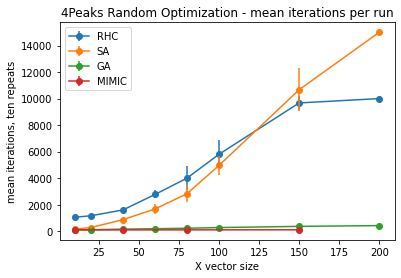

In [71]:
#plot results - iterations
#plt.plot(vectorsizes, RHC_mean_fitness , '-o', label='RHC')
plt.errorbar(x=vectorsizes, y=RHC_mean_iterations, yerr=RHC_std_iterations, barsabove=True, fmt='-o', label='RHC')
plt.errorbar(x=vectorsizes, y=SA_mean_iterations, yerr=SA_std_iterations, barsabove=True, fmt='-o', label='SA')
plt.errorbar(x=vectorsizes, y=GA_mean_iterations, yerr=GA_std_iterations, barsabove=True, fmt='-o', label='GA')
plt.errorbar(x=MIMIC_vectorsizes, y=MIMIC_mean_iterations, yerr=MIMIC_std_iterations, barsabove=True, fmt='-o', label='MIMIC')
plt.title('4Peaks Random Optimization - mean iterations per run')
plt.ylabel('mean iterations, ten repeats')
plt.xlabel('X vector size')
plt.legend()
plt.show()

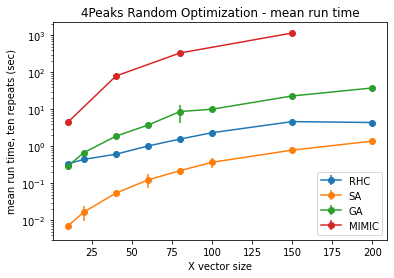

In [76]:
#plot results - run time
#plt.plot(vectorsizes, RHC_mean_fitness , '-o', label='RHC')
plt.errorbar(x=vectorsizes, y=RHC_mean_time, yerr=RHC_std_time, barsabove=True, fmt='-o', label='RHC')
plt.errorbar(x=vectorsizes, y=SA_mean_time, yerr=SA_std_time, barsabove=True, fmt='-o', label='SA')
plt.errorbar(x=vectorsizes, y=GA_mean_time, yerr=GA_std_time, barsabove=True, fmt='-o', label='GA')
plt.errorbar(x=MIMIC_vectorsizes, y=MIMIC_mean_time, yerr=MIMIC_std_time, barsabove=True, fmt='-o', label='MIMIC')
plt.title('4Peaks Random Optimization - mean run time')
plt.ylabel('mean run time, ten repeats (sec)')
plt.yscale('log')
plt.xlabel('X vector size')
plt.legend()
plt.show()

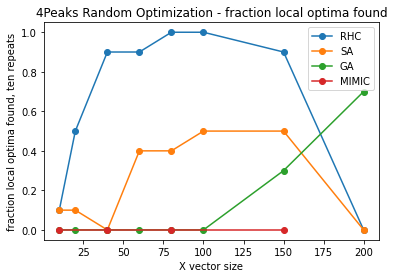

In [77]:
#plot results - Local Optima
#plt.plot(vectorsizes, RHC_mean_fitness , '-o', label='RHC')
plt.errorbar(x=vectorsizes, y=RHC_local_optima_fract, fmt='-o', label='RHC')
plt.errorbar(x=vectorsizes, y=SA_local_optima_fract, fmt='-o', label='SA')
plt.errorbar(x=vectorsizes, y=GA_local_optima_fract, fmt='-o', label='GA')
plt.errorbar(x=MIMIC_vectorsizes, y=MIMIC_local_optima_fract, fmt='-o', label='MIMIC')
plt.title('4Peaks Random Optimization - fraction local optima found')
plt.ylabel('fraction local optima found, ten repeats')
#plt.yscale('log')
plt.xlabel('X vector size')
plt.legend()
plt.show()